<a href="https://colab.research.google.com/github/kevinCSdev/Trabajo_3_Inteligencia_artifical/blob/main/Trabajo_3_Intelegencia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 2

---

Integrantes : Kevin Cárdenas - Magdiel Fernández - Diego Pardo

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción

Este notebook corresponde al desarrollo de la entrega 3 de la asignatura de Inteligencia Artificial de la Universidad del Bío Bío - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- matplotlib (3.10.0)
- pandas (2.2.2)
- seaborn (0.13.2)
- sklearn (1.6.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv

--2025-06-11 01:13:11--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402467 (393K) [text/plain]
Saving to: ‘dataset_churn_2025.csv’

dataset_churn_2025. 100%[===================>] 393.03K  --.-KB/s    in 0.04s   

2025-06-11 01:13:12 (8.73 MB/s) - ‘dataset_churn_2025.csv’ saved [402467/402467]



# Descripción de la data

+ `age` - Edad del cliente (18 a 75 años)
+ `months_active` - Meses de suscripción activa
+ `monthly_spend` - Gasto mensuales en dólares
+ `support_calls` - Número de llamadas al soporte
+ `contract_type` - Tipo de contrato: `mes_a_mes`, `1_ano`, `2_anos`
+ `has_discount` - Tiene descuento activo (1 = sí, 0 = no)
+ `churm` - Variable objetivo: 1 = abandonó, 0 = NO abandonó

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, mean_squared_error
from sklearn.tree import plot_tree


import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("dataset_churn_2025.csv")
data.head()

In [ ]:
data.info()

---

✅ Interpretación

---

- La celda anterior indica la inexistencia de valores nulos

In [ ]:
data.shape

---

✅ Interpretación

----

  -  Existen 15000 observaciones que corresponen a 15000 clientes de los cuales se tienen 14 características o variables

# Fase 4 - Modelamiento

## Modelo de clasificación

### Distribución de variable objetivo. (1 punto)

In [ ]:
data.groupby("churn").size()

In [ ]:
# Gráfico de torta del porcentaje de cada clase
clases = np.array([data[data.churn == 0.0].shape[0],
                   data[data.churn == 1.0].shape[0]]
                  )

# Creando las leyendas del gráfico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'Menos chance\n ' + labels[0]
labels[1] = 'Más chance\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de cada clase', fontsize=18, fontweight="bold")
plt.show()

---

✅ Interpretación

---

 - Se puede apreciar como la distribucion no es simétrica

### Selección de variables independientes (1 punto)

In [ ]:

# Respalda el data frame limpio original para poder experimentar con las técnicas de transformación
original_dt_final = data.copy()

# Recupera la versión original de los datos
df_final = original_dt_final
# Obtiene las columnas a codificar
categorical_features = df_final.describe(include = np.object_).columns

# Uso de OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df_final[categorical_features])

# Convierte a DataFrame para ver el resultado
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Unir con el DataFrame original (sin la columna original)
df_final = pd.concat([original_dt_final.drop('contract_type', axis=1), df_encoded], axis=1)

df_final.head()

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df_final.corr(), annot=True)
plt.title("Correlación de las variables", fontsize=18, fontweight="bold")
plt.show()

In [ ]:
corr_matrix = df_final[df_final.describe().columns].corr()
corr_matrix["churn"].sort_values(ascending=False)

---

✅ Interpretación

---

- En primer lugar, se encuentra "tipo_contrato_mes_a_mes", cuya correlación es de 0.543259, siendo la variable con mayor influencia en el análisis.

- A continuación, se ubica "tipo_contrato_1_año", con un valor de correlación de 0.383210.

- Le sigue "tipo_contrato_2_años", con una correlación de 0.279939.

- Posteriormente, se encuentra "meses_activo", con un valor de correlación de 0.223644.

- Después, se encuentra "llamadas_soporte", con un valor de correlación de 0.200268.

- Finalmente, aparece "has_discount", con una correlación de 0.199226.

- En conclusion, se ocuparan las 6 variables anteriormnete descrita debidio a que presentan la mayor correlacion respecto a la variable objetivo (churn)

In [ ]:
print("Mayor correlacion positiva : ",
    corr_matrix.query("churn < 1 and churn >= 0.1").index.values)

print("Mayor correlacion negativa : ",
    corr_matrix.query("churn <= -0.1").index.values)

# Arma la lista con los nombres de las variables
lst_features = np.append(corr_matrix.query("churn < 1 and churn >= 0.1").index.values,
    corr_matrix.query("churn <= -0.1").index.values)

In [ ]:
data_final = df_final[['churn','support_calls', 'contract_type_mes_a_mes', 'months_active', 'has_discount', 'contract_type_1_ano', 'contract_type_2_anos']]
data_final.head()

### Separación datos entrenamiento y test (1 punto)

In [ ]:
# Separar las variables predictoras (X) y la variable objetivo (y)
X = data_final.drop(columns=["churn"])
y = data_final["churn"]

# Separar 75% entrenamiento y 25% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

### Creacion de vista para matriz de confusion

In [ ]:
def view_matrix(matriz : np.array, clases : np.array):
    """ Matriz de confusión de forma gráfica """
    plt.figure(figsize=(5,5),facecolor= 'silver')
    group_counts = ["{0:0.0f}".format(value) for value in matriz.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matriz.flatten()/matriz.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
    plt.title("Matriz de confusión", fontsize=22, fontweight="bold")
    plt.xlabel("Predicción", fontsize=20)
    plt.ylabel("Real", fontsize=20)
    plt.show()

### Algoritmo 1 - DecisionTreeClassifier

#### Creación del modelo (1 punto)

#### Entrenamiento del modelo (1 punto)

In [ ]:
# Escriba su código acá

#### Evaluación del modelo

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
# Escriba su código acá

##### Accuracy (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
# Escriba su código acá

### Algoritmo 2 - Naive Bayes

#### Creación del modelo - (1 punto)

In [ ]:
model = GaussianNB()

#### Entrenamiento del modelo - (1 punto)

In [ ]:
model.fit(X_train, y_train)

GaussianNB()

#### Evaluación del modelo - (1 punto)

In [ ]:
y_pred = model.predict(X_test)

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

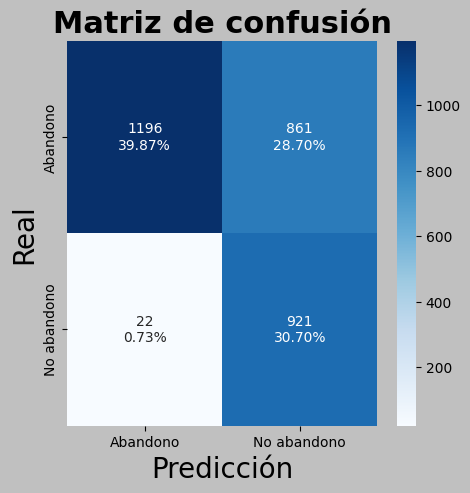

In [ ]:
variables = ['Abandono', 'No abandono']
matriz_rf = confusion_matrix(y_test, y_pred)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz_rf, variables)

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7056666666666667


### Algoritmo 3 - Regresión Logística

#### Creación del modelo - (1 punto)

In [ ]:
# Escriba su código acá

#### Entrenamiento del modelo - (1 punto)

In [ ]:
# Escriba su código acá

#### Evaluación del modelo - (1 punto)

In [ ]:
# Escriba su código acá

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
# Escriba su código acá

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
# Escriba su código acá

### Algoritmo 4 - RandomForest

#### Creación del modelo - (1 punto)

In [ ]:
# Escriba su código acá

#### Entrenamiento del modelo - (1 punto)

In [ ]:
# Escriba su código acá

#### Evaluación del modelo - (1 punto)

In [ ]:
# Escriba su código acá

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
# Escriba su código acá

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
# Escriba su código acá

### Comparación de los modelos - (2 puntos)

In [ ]:
# Escriba su código acá